Lesson 1 - Fundamentals
====================



## Basic Python
1. Write **a function** that prints the numbers from **1 to 20**. But for **multiples of three print “Fizz”** instead of the number and for the **multiples of five print “Buzz”**. For numbers which are **multiples of both three and five print “FizzBuzz”**.

In [9]:
def fizz_buzz():  
  for x in range(1, 21):
    if x%3 == 0 and x%5 == 0:
      print("FizzBuzz")      
    elif x%3 == 0 and x%5 != 0:
      print("Fizz")
    elif x%5 == 0 and x%3 != 0:
      print("Buzz")    
    else: 
      print(x)
    
fizz_buzz()

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz


2. Return the **number of even ints** in the given array. Note: the % "mod" operator computes the remainder, e.g. 5 % 2 is 1.

```
count_evens([2, 1, 2, 3, 4]) → 3
count_evens([2, 2, 0]) → 3
count_evens([1, 3, 5]) → 0
```

In [10]:
def count_evens(nums):
  count = 0
  for num in nums:
    if num%2 == 0:
      count = count + 1
  
  return count

test_1 = count_evens([2, 1, 2, 3, 4])
test_2 = count_evens([2, 2, 0])
test_3 = count_evens([1, 3, 5])
print("test_1: ", test_1)
print("test_2: ", test_2)
print("test_3: ", test_3)

test_1:  3
test_2:  3
test_3:  0



3. Return the **sum of the numbers in the array**, **returning 0 for an empty array**. Except the **number 13** is very unlucky, so it does not count and numbers that come immediately after a 13 also do not count.

```
sum13([1, 2, 2, 1]) → 6
sum13([1, 1]) → 2
sum13([1, 2, 2, 1, 13]) → 6
```

In [15]:
def sum13(nums):
  total = 0
  for num in nums:
    if num != 13:
      total = total + num
  
  return total

test_1 = sum13([1, 2, 2, 1])
test_2 = sum13([1, 1])
test_3 = sum13([1, 2, 2, 1, 13])
# need to print out value of test_1, test_2, test_3
print(test_1)
print(test_2)
print(test_3)


6
2
6


## Get started in Machine Learning in 5 steps

In this example we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days Thursday to Sunday, dinner or lunch and from different table size.

We want to predict how much tip the waiter will earn based on other parameters.

### Step 1: Import libraries 
Today, we mainly focus on pandas and seaborn library

[**pandas**](https://pandas.pydata.org/) is an open source , easy-to-use data structures and data analysis tools for the Python programming language.

[**seaborn**](https://seaborn.pydata.org/) is  a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

In [0]:
import pandas as pd
import seaborn as sns

#### Import data

Pandas has very useful tool for you to read data from many resource (excel, csv file ... ). To import data, we use
```
data = pd.read_csv('path_to_csv_file')
```
here is our dataset
https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

Let's take a look at our dataset! 

Try to use data.head()

In [17]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


### Step 2: Ask questions

#### What kind of category are there in column 'sex', 'smoker', 'day', 'time'?

In [20]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
data['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
data['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [23]:
data['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [24]:
data['size'].unique()

array([2, 3, 4, 1, 6, 5])

#### How many woman/man pay for the dish?

In [25]:
data['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

#### How many smokers/non-smokers pay for the dish?

In [26]:
data['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

#### Lets find out what is the best day to work – maximum tips (sum and percents)

In [28]:
data.groupby('day').sum()

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


#### Who eats more (and tips more)? smokers or non smokers?

In [33]:
data3 = data.groupby('smoker').sum()
data3['percentage'] = data3['tip']/data3['total_bill'] * 100
data4 = data3
data4['percentperbill'] = data3['percentage'] / data3['size']
data4

,total_bill,tip,size,percentage,percentperbill
smoker,,,,,
No,2897.43,451.77,403,15.592094,0.038690
Yes,1930.34,279.81,224,14.495374,0.064711


### Step 3: Data vizualization

Let's draw some seaborn graph

#### Tables per day

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


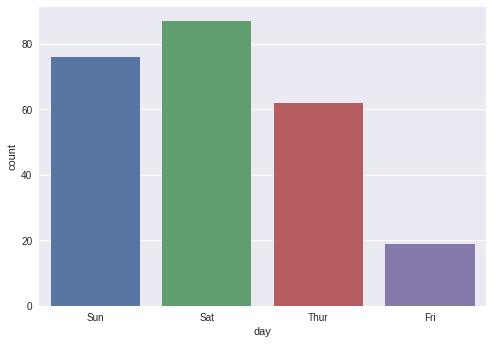

In [34]:
sns.countplot(data=data, x='day')

#### Tables per day per gender


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


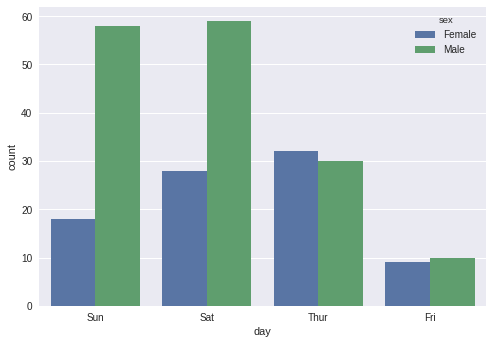

In [36]:
sns.countplot(data=data, x='day', hue='sex')

#### Table lunch vs dinner

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


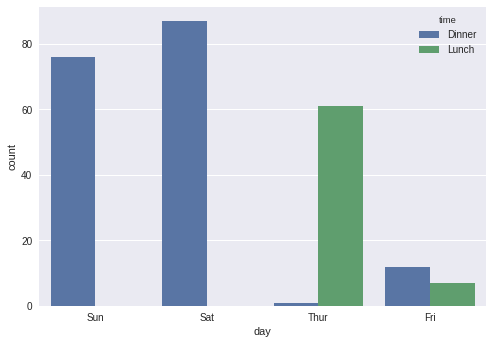

In [37]:
sns.countplot(data=data, x='day', hue='time')